# Сбор данных
**Сбор данных с Авито**


In [96]:
#! /usr/bin/env python
# -*- coding: utf-8 -*-
import requests
from bs4 import CData
from bs4 import BeautifulSoup
res = []
pages_num = 10

for i in range(1, pages_num):
    url = "https://www.avito.ru/moskva/kvartiry/sdam/na_dlitelnyy_srok?p=" + str(i) +"&metro=7-25-30-110&f=550_5702-5703-5704"

    session = requests.Session()
    html_code = session.get(url)
    soup = BeautifulSoup(html_code.text, 'html.parser')

    for elem in soup.find_all("div", {"class": "item_table"}):
        res.append([])
        for d in elem.find_all("div", {"class": "description"}):
            s = d.find("div", {"class": "about"}).text.strip().split('\n')[0].strip()
            s = s.replace(" руб. в месяц", "")
            s = s.replace(" ", "")
            res[-1].append(s)
            v = d.find("div", {"class": "item_table-header"}).h3.text.strip().split(", ")
            v[0] = str(v[0][0])
            v[1] = str(v[1].replace(" м²", ""))
            v[2] = str(v[2].replace(" эт.", ""))
            res[-1] += v
            s = d.find("i", {"class": "i-metro"}).next_element.string.strip()
            res[-1].append(s)
            s = d.find("i", {"class": "i-metro"}).next_element.next_element.string.strip()
            if (s.find("км")):
                s = s.replace(" км", "00")
                if (not(s.find("."))):
                    s += "0"
                else:
                    s = s.replace(".", "")
            if (s.find(" м")):
                s = s.replace(" м", "")
            res[-1].append(s)
            s = d.find("i", {"class": "i-metro"}).next_element.next_element.next_element.next_element.string.strip()
            s = s[2:]
            for i in range (0,len(s)):
                if (ord(s[i]) == 160):
                    s = s.replace(s[i], " ")
            res[-1].append(s)
            if (res[-1][-1] == "ентство" or res[-1][0] == ''):
                res.pop()
print(*res, sep='\n')
f = open('avito.txt', 'w')
for i in range (0, len(res)):
    for j in range (0, len(res[i])):
        f.write(str(res[i][j]).ljust(15))
    f.write('\n')
f.close()

['45000', '2', '56', '1/9', 'Аэропорт', '700', 'Планетная улица д. 47, стр. 1']
['33000', '1', '29', '7/10', 'Сокол', '500', 'ул Усиевича 18']
['49000', '2', '60', '2/5', 'Динамо', '100', 'Мирской пер, 5']
['40000', '2', '45', '4/5', 'Аэропорт', '700', 'Москва, улица Викторенко, 12/1']
['80000', '2', '66.7', '16/34', 'Аэропорт', '1100', 'Москва, Кочновский проезд, 4к2']
['45000', '2', '45', '7/9', 'Динамо', '1200', 'ул. Красноармейская д. 9 Москва']
['40000', '1', '38', '7/14', 'Сокол', '3600', 'Габричевского ул, 10']
['45000', '1', '30', '5/12', 'Динамо', '100', 'Ленинградский пр-кт, 33А']
['35000', '2', '45', '8/9', 'Войковская', '1700', 'Приорова ул']
['35000', '1', '32', '2/5', 'Динамо', '100', 'ул первая Бебеля, 7']
['75000', '2', '75', '18/19', 'Аэропорт', '400', 'ул Викторенко, 4к1']
['55000', '2', '42', '3/5', 'Сокол', '800', 'ул Часовая, д 21А']
['75000', '2', '50', '3/5', 'Аэропорт', '500', 'ул Красноармейская, д. 32']
['30000', '1', '42', '6/12', 'Сокол', '200', 'Ленинградск

**Сбор данных с Домофонд**

In [99]:
import requests
from bs4 import CData
from bs4 import BeautifulSoup

pages_num = 20
for i in range(1, pages_num):
    url = "https://www.domofond.ru/arenda-nedvizhimosti/search?MetroIds=21%2C44%2C124%2C39&PropertyTypeDescription=kvartiry&RentalRate=Month&Rooms=One%2CTwo&Page="+str(i)
    session = requests.Session()
    html_code = session.get(url)
    soup = BeautifulSoup(html_code.text, 'html.parser')

    for elem in soup.find_all("div", {"class": "media-body e-content"}):
        res.append([])
        s = elem.a.h2.text
        for i in range (0, len(s)):
            if (ord(s[i]) == 160):
                s = s.replace(s[i], " ")
        s = s.replace(" ", "")
        s = s.replace("РУБ.", "")
        res[-1].append(s)
        for d in elem.find_all("span", {"class": "e-tile-type m-max-width text-overflow"}):
            v = d.text.strip().split(", ")
            v[0] = str(v[0][0])
            v[1] = str(v[1].replace(" м²", ""))
            v[2] = str(v[2].replace(" эт.", ""))
            res[-1] += (v)
        mtr = elem.find("div", {"class": "e-metro-distance"})
        mtr = mtr.strong.text.split(" ")
        res[-1].append(mtr[0])
        if (mtr[2] == "м"):
            res[-1].append(mtr[1])
        else:
            mtr[1] = mtr[1].replace(",", ".")
            mtr[1] = int(float(mtr[1]) * 1000)
            res[-1].append(mtr[1])
        for ad in elem.find_all("span", {"class": "e-tile-address"}):
            res[-1].append(ad.span.text)
f = open('domofond.txt', 'w')
for i in range (0, len(res)):
    for j in range (0, len(res[i])):
        f.write(str(res[i][j]).ljust(15))
    f.write('\n')
f.close()
print(*res, sep='\n')

['45000', '2', '56', '1/9', 'Аэропорт', '700', 'Планетная улица д. 47, стр. 1']
['33000', '1', '29', '7/10', 'Сокол', '500', 'ул Усиевича 18']
['49000', '2', '60', '2/5', 'Динамо', '100', 'Мирской пер, 5']
['40000', '2', '45', '4/5', 'Аэропорт', '700', 'Москва, улица Викторенко, 12/1']
['80000', '2', '66.7', '16/34', 'Аэропорт', '1100', 'Москва, Кочновский проезд, 4к2']
['45000', '2', '45', '7/9', 'Динамо', '1200', 'ул. Красноармейская д. 9 Москва']
['40000', '1', '38', '7/14', 'Сокол', '3600', 'Габричевского ул, 10']
['45000', '1', '30', '5/12', 'Динамо', '100', 'Ленинградский пр-кт, 33А']
['35000', '2', '45', '8/9', 'Войковская', '1700', 'Приорова ул']
['35000', '1', '32', '2/5', 'Динамо', '100', 'ул первая Бебеля, 7']
['75000', '2', '75', '18/19', 'Аэропорт', '400', 'ул Викторенко, 4к1']
['55000', '2', '42', '3/5', 'Сокол', '800', 'ул Часовая, д 21А']
['75000', '2', '50', '3/5', 'Аэропорт', '500', 'ул Красноармейская, д. 32']
['30000', '1', '42', '6/12', 'Сокол', '200', 'Ленинградск

['35000', '1', '44', '9/25', 'Войковская', 2790, 'Москва, Большая Набережная улица, 19к2, Покровское-Стрешнево, Москва']
['120000', '2', '70', '3/4', 'Динамо', 2190, 'Москва, улица Пресненский Вал, 36, Москва']
['35000', '1', '33', '10/12', 'Сокол', 2290, 'Ирины Левченко ул, 1, Москва']
['65000', '2', '75', '13/14', 'Динамо', 1600, 'Москва, м. Дмитровская, м. Динамо, 4-ый Вятский переулок д18 корп 3, Савёловский, Москва']
['36000', '1', '33', '1/5', 'Аэропорт', '410', 'Авиационный пер, 4, Аэропорт, Москва']
['33000', '1', '40', '12/14', 'Войковская', 1590, 'Москва, улица Зои и Александра Космодемьянских, 29, Коптево, Москва']
['38000', '2', '36.6', '4/12', 'Динамо', 1990, 'ул.Хорошевское шоссе д36 а, Хорошёвский, Москва']
['35000', '1', '38.5', '16/16', 'Аэропорт', 2480, 'Астрадамская ул, д. 6, Тимирязевский, Москва']
['28000', '1', '32', '4/5', 'Войковская', 2220, 'ул Коптевская, 79/1, Москва']
['65000', '2', '45', '3/9', 'Динамо', 1960, 'ул Бутырский Вал, 28, Тверской, Москва']
['400

In [98]:
for i in range (0, len(res)):
    s = res[i][0]
    for j in range (0, len(s)):
            if (ord(s[j]) == 160):
                s = s.replace(s[j], " ")
    s = s.replace(" ", "")
    s = s.replace("РУБ.", "")
    res[i][0] = s
print(*res, sep='\n')

['45000', '2', '56', '1/9', 'Аэропорт', '700', 'Планетная улица д. 47, стр. 1']
['33000', '1', '29', '7/10', 'Сокол', '500', 'ул Усиевича 18']
['49000', '2', '60', '2/5', 'Динамо', '100', 'Мирской пер, 5']
['40000', '2', '45', '4/5', 'Аэропорт', '700', 'Москва, улица Викторенко, 12/1']
['80000', '2', '66.7', '16/34', 'Аэропорт', '1100', 'Москва, Кочновский проезд, 4к2']
['45000', '2', '45', '7/9', 'Динамо', '1200', 'ул. Красноармейская д. 9 Москва']
['40000', '1', '38', '7/14', 'Сокол', '3600', 'Габричевского ул, 10']
['45000', '1', '30', '5/12', 'Динамо', '100', 'Ленинградский пр-кт, 33А']
['35000', '2', '45', '8/9', 'Войковская', '1700', 'Приорова ул']
['35000', '1', '32', '2/5', 'Динамо', '100', 'ул первая Бебеля, 7']
['75000', '2', '75', '18/19', 'Аэропорт', '400', 'ул Викторенко, 4к1']
['55000', '2', '42', '3/5', 'Сокол', '800', 'ул Часовая, д 21А']
['75000', '2', '50', '3/5', 'Аэропорт', '500', 'ул Красноармейская, д. 32']
['30000', '1', '42', '6/12', 'Сокол', '200', 'Ленинградск

['50000', '1', '43', '16/17', 'Динамо', 2250, 'второй Хорошёвский проезд, 5, Хорошёвский, Москва']
['49000', '2', '60', '2/5', 'Динамо', '950', 'Мирской пер, 5, Савёловский, Москва']
['49000', '2', '60', '2/5', 'Динамо', '950', 'Мирской пер, 5, Савёловский, Москва']
['33000', '1', '33', '1/9', 'Динамо', '1000', 'Беговая аллея, 7к2, Беговой, Москва']
['90000', '2', '90', '7/8', 'Аэропорт', 1740, 'Ходынский б-р, 15, Хорошёвский, Москва']
['70000', '2', '82', '7/25', 'Сокол', 1720, 'ул Маршала Соколовского, 1, Щукино, Москва']
['73000', '2', '80', '15/26', 'Сокол', '160', 'Ленинградский проспект 76 к 2, Аэропорт, Москва']
['38000', '1', '35', '2/5', 'Динамо', 1380, 'Башиловская, 10, Савёловский, Москва']
['55000', '2', '42', '3/5', 'Сокол', '760', 'ул Часовая, д 21А, Аэропорт, Москва']
['90000', '2', '52', '3/8', 'Динамо', 1270, 'ул Правды, д 7/9, Беговой, Москва']
['35000', '2', '45', '13/14', 'Сокол', 2540, 'Москва, улица Берзарина, 5, Хорошёво-Мнёвники, Москва']
['38000', '1', '39', '4

**Выгрузка данных в таблицу html**

In [104]:
out = open('index.html', 'w')
out.write("<!DOCTYPE html>\n")
out.write("<html>\n")
out.write("<body>\n")
out.write("<h2> Съёмное жильё в Москве на севере Замоскворецкой линии <h2>\n")
out.write('<table style="width:100%">\n')
header = ["Цена", "Кол-во комнат", "Площадь", "Этаж", "Станция метро", "Расстояние до метро", "Адрес"]
out.write("<tr>\n")
for elem in header:
    out.write("<th>")
    out.write(elem)
    out.write("</th>\n")
out.write("</tr>\n")
for i in range(len(res)):
    out.write("<tr>\n")
    for j in range (len(res[i])):
        out.write("<th>")
        out.write(str(res[i][j]))
        out.write("</th>\n")
    out.write("</tr>\n")
out.close()

1223


Для начала сравним арендную плату на разных станциях метро. Некорректно было бы сравнивать средние цены вообще (где-то двухкомнатных квартир больше, соответственно средняя цена будет выше), поэтому разделим все квартиры на два кластера.

210 72 80 140
262 153 120 175


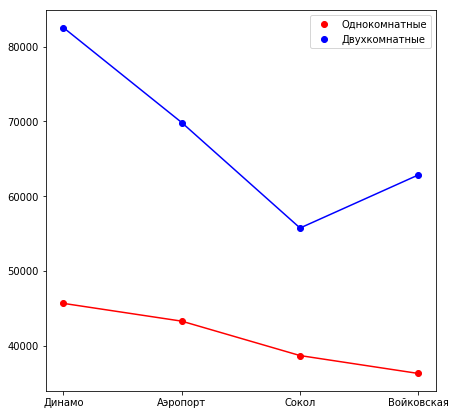

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
sd1 = 0
sd1sum = 0
sa1 = 0
sa1sum = 0
ss1 = 0
ss1sum = 0
sv1 = 0
sv1sum = 0
sd2 = 0
sd2sum = 0
sa2 = 0
sa2sum = 0
ss2 = 0
ss2sum = 0
sv2 = 0
sv2sum = 0
for i in range(len(res)):
    if (res[i][4] == "Динамо"):
        if (res[i][1] == '1'):
            sd1 += int(1)
            sd1sum += int(res[i][0])
        if (res[i][1] == '2'):
            sd2 += int(1)
            sd2sum += int(res[i][0])
    elif (res[i][4] == "Аэропорт"):
        if (res[i][1] == '1'):
            sa1 += int(1)
            sa1sum += int(res[i][0])
        if (res[i][1] == '2'):
            sa2 += int(1)
            sa2sum += int(res[i][0])
    elif (res[i][4] == "Сокол"):
        if (res[i][1] == '1'):
            ss1 += int(1)
            ss1sum += int(res[i][0])
        if (res[i][1] == '2'):
            ss2 += int(1)
            ss2sum += int(res[i][0])
    elif (res[i][4] == "Войковская"):
        if (res[i][1] == '1'):
            sv1 += int(1)
            sv1sum += int(res[i][0])
        if (res[i][1] == '2'):
            sv2 += int(1)
            sv2sum += int(res[i][0])
sd1mean = sd1sum/sd1
sa1mean = sa1sum/sa1
ss1mean = ss1sum/ss1
sv1mean = sv1sum/sv1
sd2mean = sd2sum/sd2
sa2mean = sa2sum/sa2
ss2mean = ss2sum/ss2
sv2mean = sv2sum/sv2
one = [sd1mean, sa1mean, ss1mean, sv1mean]
names = ['Динамо', 'Аэропорт', 'Сокол', 'Войковская']
two = [sd2mean, sa2mean, ss2mean, sv2mean]
print(sd1, sa1, ss1, sv1)
print(sd2, sa2, ss2, sv2)
plt.figure(figsize=(7,7))
x = [0,1,2,3]
plt.xticks(x, names)
p1 = plt.plot(x, one, 'bo', x, one, 'k', color='red')
p2 =plt.plot(x, two, 'bo', x, two, 'k', color='blue')
plt.legend((p1[0], p2[0]), ('Однокомнатные', 'Двухкомнатные'))
plt.show()

На графике можно увидеть, что однокомнатные резонно стоят дешевле, однако всего на несколько тысяч. Это обусловлено рамками бюджета (в проекте рассматриваются квартиры с арендной платой до 40000 рублей). На Динамо в рамках бюджета рассматриваются самые бюджетные и, честно, не очень комфортабельные и красивые квартиры. Аэропорт - самый дорогой из выбранных районов. Далее от центра количество предложений возрастает, из чего следует, что средняя цена более реалистична на большей выборке. 

Теперь рассмотрим зависимость цены от дальности непосредственно станций метро. Близость к метро важна на всех станциях, кроме "Аэропорт", на которой идеальное расстояние от метро - около километра. 

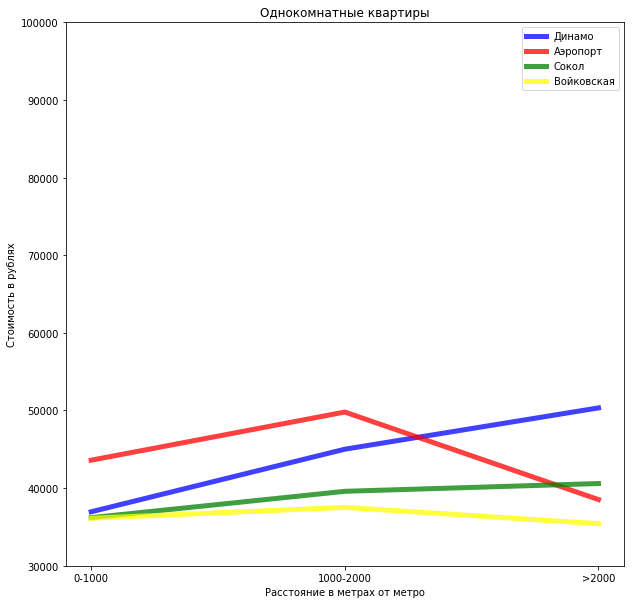

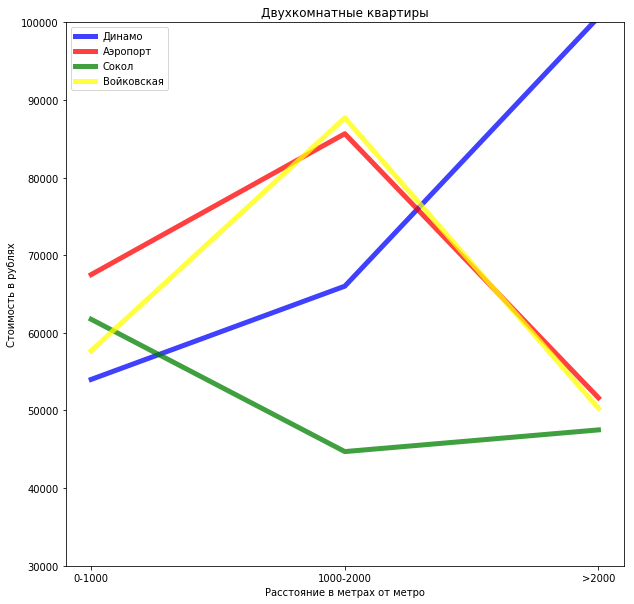

In [134]:
dnum = [0,0,0,0,0,0]
dsum = [0,0,0,0,0,0]
anum = dnum.copy()
asum = dsum.copy()
snum = dnum.copy()
ssum = dsum.copy()
vnum = dnum.copy()
vsum = dsum.copy()
for i in range(len(res)):
    if (res[i][4] == "Динамо"):
        if (res[i][1] == '1'):
            if (int(res[i][5]) <= 1000):
                dnum[0] += int(1)
                dsum[0] += int(res[i][0])
            elif (int(res[i][5]) <= 2000):
                dnum[1] += int(1)
                dsum[1] += int(res[i][0])
            else:
                dnum[2] += int(1)
                dsum[2] += int(res[i][0])
        if (res[i][1] == '2'):
            if (int(res[i][5]) <= 1000):
                dnum[3] += int(1)
                dsum[3] += int(res[i][0])
            elif (int(res[i][5]) <= 2000):
                dnum[4] += int(1)
                dsum[4] += int(res[i][0])
            else:
                dnum[5] += int(1)
                dsum[5] += int(res[i][0])
    if (res[i][4] == "Аэропорт"):
        if (res[i][1] == '1'):
            if (int(res[i][5]) <= 1000):
                anum[0] += int(1)
                asum[0] += int(res[i][0])
            elif (int(res[i][5]) <= 2000):
                anum[1] += int(1)
                asum[1] += int(res[i][0])
            else:
                anum[2] += int(1)
                asum[2] += int(res[i][0])
        if (res[i][1] == '2'):
            if (int(res[i][5]) <= 1000):
                anum[3] += int(1)
                asum[3] += int(res[i][0])
            elif (int(res[i][5]) <= 2000):
                anum[4] += int(1)
                asum[4] += int(res[i][0])
            else:
                anum[5] += int(1)
                asum[5] += int(res[i][0])
    if (res[i][4] == "Сокол"):
        if (res[i][1] == '1'):
            if (int(res[i][5]) <= 1000):
                snum[0] += int(1)
                ssum[0] += int(res[i][0])
            elif (int(res[i][5]) <= 2000):
                snum[1] += int(1)
                ssum[1] += int(res[i][0])
            else:
                snum[2] += int(1)
                ssum[2] += int(res[i][0])
        if (res[i][1] == '2'):
            if (int(res[i][5]) <= 1000):
                snum[3] += int(1)
                ssum[3] += int(res[i][0])
            elif (int(res[i][5]) <= 2000):
                snum[4] += int(1)
                ssum[4] += int(res[i][0])
            else:
                snum[5] += int(1)
                ssum[5] += int(res[i][0])
    if (res[i][4] == "Войковская"):
        if (res[i][1] == '1'):
            if (int(res[i][5]) <= 1000):
                vnum[0] += int(1)
                vsum[0] += int(res[i][0])
            elif (int(res[i][5]) <= 2000):
                vnum[1] += int(1)
                vsum[1] += int(res[i][0])
            else:
                vnum[2] += int(1)
                vsum[2] += int(res[i][0])
        if (res[i][1] == '2'):
            if (int(res[i][5]) <= 1000):
                vnum[3] += int(1)
                vsum[3] += int(res[i][0])
            elif (int(res[i][5]) <= 2000):
                vnum[4] += int(1)
                vsum[4] += int(res[i][0])
            else:
                vnum[5] += int(1)
                vsum[5] += int(res[i][0])
dinamomean = [dsum[0]/dnum[0], dsum[1]/dnum[1], dsum[2]/dnum[2], dsum[3]/dnum[3], dsum[4]/dnum[4], dsum[5]/dnum[5]]
aeroportmean = [asum[0]/anum[0], asum[1]/anum[1], asum[2]/anum[2], asum[3]/anum[3], asum[4]/anum[4], asum[5]/anum[5]]
sokolmean = [ssum[0]/snum[0], ssum[1]/snum[1], ssum[2]/snum[2], ssum[3]/snum[3], ssum[4]/snum[4], ssum[5]/snum[5]]
voikovskayamean = [vsum[0]/vnum[0], vsum[1]/vnum[1], vsum[2]/vnum[2], vsum[3]/vnum[3], vsum[4]/vnum[4], vsum[5]/vnum[5]]
plt.figure(figsize=(10,10))
x = [0,1,2]
dist = ['0-1000','1000-2000', '>2000']
plt.xticks(x, dist)
ax = plt.gca()
ax.set_ylim([30000,100000])
p1 = plt.plot(x, dinamomean[:3], color='blue', axes=ax, linewidth=5.0, alpha=0.75)
p2 = plt.plot(x, aeroportmean[:3], color='red',axes=ax, linewidth=5.0, alpha=0.75)
p3 = plt.plot(x,sokolmean[:3], color='green',axes=ax, linewidth=5.0, alpha=0.75)
p4 = plt.plot(x, voikovskayamean[:3], color='yellow',axes=ax, linewidth=5.0, alpha=0.75)
plt.title('Однокомнатные квартиры')
plt.xlabel('Расстояние в метрах от метро')
plt.ylabel('Стоимость в рублях')
plt.legend((p1[0],p2[0],p3[0],p4[0]), ('Динамо', 'Аэропорт', 'Сокол', 'Войковская'))
plt.show()

plt.figure(figsize=(10,10))
x = [0,1,2]
dist = ['0-1000','1000-2000', '>2000']
plt.xticks(x, dist)
ax = plt.gca()
ax.set_ylim([30000,100000])
p1 = plt.plot(x, dinamomean[3:], color='blue', axes=ax, linewidth=5.0, alpha=0.75)
p2 = plt.plot(x, aeroportmean[3:], color='red', axes=ax, linewidth=5.0, alpha=0.75)
p3 = plt.plot(x,sokolmean[3:], color='green',axes=ax, linewidth=5.0, alpha=0.75)
p4 = plt.plot(x, voikovskayamean[3:], color='yellow',axes=ax, linewidth=5.0, alpha=0.75)
plt.title('Двухкомнатные квартиры')
plt.xlabel('Расстояние в метрах от метро')
plt.ylabel('Стоимость в рублях')
plt.legend((p1[0],p2[0],p3[0],p4[0]), ('Динамо', 'Аэропорт', 'Сокол', 'Войковская'))
plt.show()


[171, 191, 89, 25]
[48, 93, 60, 26]
[81, 87, 20, 14]
[114, 166, 30, 3]


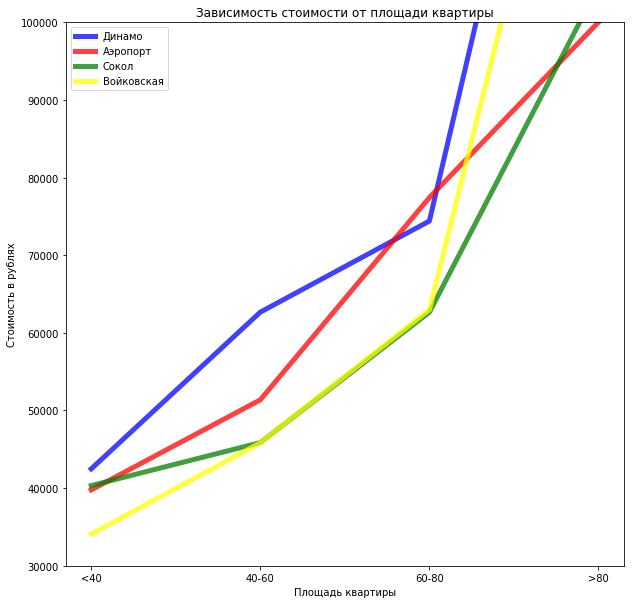

In [142]:
dnum = [0,0,0,0]
dsum = [0,0,0,0]
anum = dnum.copy()
asum = dsum.copy()
snum = dnum.copy()
ssum = dsum.copy()
vnum = dnum.copy()
vsum = dsum.copy()
for i in range(len(res)):
    if (res[i][4] == "Динамо"):
        if (float(res[i][2]) <= float(40)):
            dnum[0] += int(1)
            dsum[0] += int(res[i][0])
        elif (float(res[i][2]) <= float(60)):
            dnum[1] += int(1)
            dsum[1] += int(res[i][0])
        elif (float(res[i][2]) <= float(80)):
            dnum[2] += int(1)
            dsum[2] += int(res[i][0])
        elif (float(res[i][2]) <= float(200)):
            dnum[3] += int(1)
            dsum[3] += int(res[i][0])           
    if (res[i][4] == "Аэропорт"):
        if (float(res[i][2]) <= float(40)):
            anum[0] += int(1)
            asum[0] += int(res[i][0])
        elif (float(res[i][2]) <= float(60)):
            anum[1] += int(1)
            asum[1] += int(res[i][0])
        elif (float(res[i][2]) <= float(80)):
            anum[2] += int(1)
            asum[2] += int(res[i][0])
        elif (float(res[i][2]) <= float(200)):
            anum[3] += int(1)
            asum[3] += int(res[i][0])  
    if (res[i][4] == "Сокол"):
        if (float(res[i][2]) <= float(40)):
            snum[0] += int(1)
            ssum[0] += int(res[i][0])
        elif (float(res[i][2]) <= float(60)):
            snum[1] += int(1)
            ssum[1] += int(res[i][0])
        elif (float(res[i][2]) <= float(80)):
            snum[2] += int(1)
            ssum[2] += int(res[i][0])
        elif (float(res[i][2]) <= float(200)):
            snum[3] += int(1)
            ssum[3] += int(res[i][0])     
    if (res[i][4] == "Войковская"):
        if (float(res[i][2]) <= float(40)):
            vnum[0] += int(1)
            vsum[0] += int(res[i][0])
        elif (float(res[i][2]) <= float(60)):
            vnum[1] += int(1)
            vsum[1] += int(res[i][0])
        elif (float(res[i][2]) <= float(80)):
            vnum[2] += int(1)
            vsum[2] += int(res[i][0])
        elif (float(res[i][2]) <= float(200)):
            vnum[3] += int(1)
            vsum[3] += int(res[i][0]) 
dinamomean = [dsum[0]/dnum[0], dsum[1]/dnum[1], dsum[2]/dnum[2], dsum[3]/dnum[3]]
aeroportmean = [asum[0]/anum[0], asum[1]/anum[1], asum[2]/anum[2], asum[3]/anum[3]]
sokolmean = [ssum[0]/snum[0], ssum[1]/snum[1], ssum[2]/snum[2], ssum[3]/snum[3]]
voikovskayamean = [vsum[0]/vnum[0], vsum[1]/vnum[1], vsum[2]/vnum[2], vsum[3]/vnum[3]]
print(dnum)
print(anum)
print(snum)
print(vnum)
plt.figure(figsize=(10,10))
x = [0,1,2,3]
dist = ['<40', '40-60', '60-80', '>80']
plt.xticks(x, dist)
ax = plt.gca()
ax.set_ylim([30000,100000])
p1 = plt.plot(x, dinamomean, color='blue', axes=ax, linewidth=5.0, alpha=0.75)
p2 = plt.plot(x, aeroportmean, color='red',axes=ax, linewidth=5.0, alpha=0.75)
p3 = plt.plot(x,sokolmean, color='green',axes=ax, linewidth=5.0, alpha=0.75)
p4 = plt.plot(x, voikovskayamean, color='yellow',axes=ax, linewidth=5.0, alpha=0.75)
plt.title('Зависимость стоимости от площади квартиры')
plt.xlabel('Площадь квартиры')
plt.ylabel('Стоимость в рублях')
plt.legend((p1[0],p2[0],p3[0],p4[0]), ('Динамо', 'Аэропорт', 'Сокол', 'Войковская'))
plt.show()


Я намеренно отсеяла помещения площадью более 200 квадратных метров, поскольку зачастую это офисные здания. Относительно площади можно с уверенностью сказать, что стоимость зависит от площади прямопропорционально. При маленьких площадях соблюдается зависимость и от станции метро, однако чем дальше от центра, тем непредсказуемее. На основе всех графиков можно предположить, что на среднем расстоянии от метро есть элитные районы, стоимость жилья в которых резко растёт вне зависимости от близости к метро и площади квартиры.